In [1]:
# Rachel Singleton
# Math 472
# Homework 1

# Write a Python script to implement the bisection algorithm in Example 2.1 (page 23)
# 
# Required Output:
# (a) Print the number of iterations and the final solution.
# (b) Plot Figure 2.1 produced by your Python script.
# (c) Plot Figure 2.2 produced by your Python script.

Number of iterations:  13
Final Solution:  3.591064453125


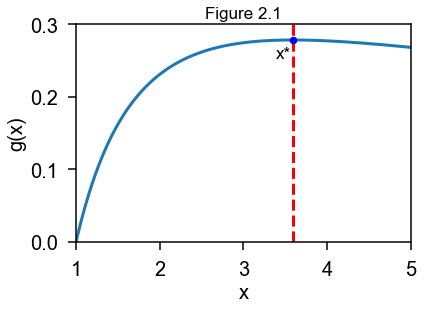

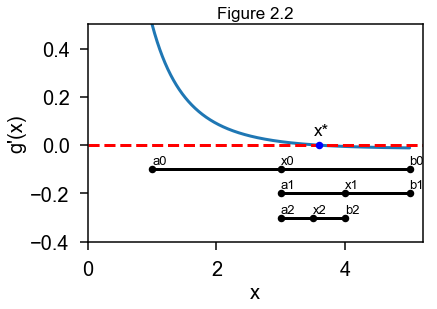

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The function we are trying to maximize
def function_g(x):
    return (np.log(x))/(1+x)
    
# The derivative of the function we are trying to maximize
def derivative_g(x):
    return (1+(1/x)-(np.log(x)))/((1+x)**2)

# The bisection method
def bisection_method(a,b,x):
    
    num_iterations = 0
    max_iterations = 20
    tolerance = 0.000001 # 1*10^-6
    
    # First check to see if the points entered are valid
    if(a > b or b < a or x > b or x < a):
        print("Your bounds are not valid to use this method. Please try again.")
        return
    elif(derivative_g(a)*derivative_g(b) > 0):
        print("Your bounds do not include a root. Please try again.")
        return
    else:
        # Adding the starting values to the list
        interval_a = [a]
        interval_b = [b]
        x_values = [x]
        
        # For graphing later
        x_axis_vals = np.linspace(a, b, 1000)
        
        # Checking to see if we hit the maximum number of iterations or reached our tolerance
        while((num_iterations < max_iterations) and (abs(derivative_g(x)) > tolerance)):
            
            num_iterations = num_iterations+1

            # Checking to see which half of the graph we are going to follow
            if(derivative_g(a)*derivative_g(x) <= 0):
                b = x
                x = 0.5*(a+b)
            elif(derivative_g(a)*derivative_g(x) > 0):
                a = x
                x = 0.5*(a+b)

            # Appending the new values to the list
            interval_a.append(a)
            interval_b.append(b)
            x_values.append(x)
        
        # Now we've finished all of our iterations and it's time for results!
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", x_values[num_iterations])
        
        # Now we graph!
        
        # Plot figure 2.1
        plt.figure(1)
        plt.plot(x_axis_vals,function_g(x_axis_vals))
        plt.axvline(x_values[num_iterations], color = 'r', ls='--')
        plt.plot(x_values[num_iterations], function_g(x_values[num_iterations]), 'bo')
        plt.axis([1, 5, 0, 0.3])
        plt.xlabel('x',fontsize=20)
        plt.ylabel('g(x)',fontsize=20)
        plt.title('Figure 2.1',fontsize=17)
        plt.annotate('x*',xy=(x_values[num_iterations]-0.2,function_g(x_values[num_iterations])-0.025),fontsize=17)
        
        plt.show()
        
        # Plot figure 2.2
        plt.figure(2)
        plt.plot(x_axis_vals,derivative_g(x_axis_vals))
        plt.axhline(derivative_g(x_values[num_iterations]), color = 'r', ls='--')
        plt.plot(x_values[num_iterations], derivative_g(x_values[num_iterations]), 'bo')
        plt.axis([0, 5.2, -0.4, 0.5])
        plt.xlabel('x',fontsize=20)
        plt.ylabel('g\'(x)',fontsize=20)
        plt.title('Figure 2.2',fontsize=17)
        plt.annotate('x*',xy=(x_values[num_iterations]-0.08,derivative_g(x_values[num_iterations])+0.04),fontsize=17)
        
        graphing_lines(interval_a, interval_b, x_values, x_values[num_iterations], num_iterations)
        
        plt.show()
        
def graphing_lines(alist, blist, xlist, x, num_iterations):
    max_lines = 3
    lines = 0
    
    while (lines < max_lines):
        plt.hlines(derivative_g(xlist[num_iterations])-(0.1*(lines+1)),alist[lines],blist[lines])
        plt.plot(alist[lines],derivative_g(x)-(0.1*(lines+1)), 'ko')
        plt.plot(blist[lines],derivative_g(x)-(0.1*(lines+1)), 'ko')
        plt.plot(xlist[lines],derivative_g(x)-(0.1*(lines+1)), 'ko')
        plt.annotate('a'+str(lines), (alist[lines], derivative_g(x)-(0.1*(lines+1))+0.02),fontsize=13)
        plt.annotate('b'+str(lines), (blist[lines], derivative_g(x)-(0.1*(lines+1))+0.02),fontsize=13)
        plt.annotate('x'+str(lines), (xlist[lines], derivative_g(x)-(0.1*(lines+1))+0.02),fontsize=13)
        lines = lines + 1

# Run the method!
bisection_method(1,5,3)

In [3]:
# We want to maximize the following function using these parameters:
# g(x) = (log(x))/(1+x), a_0=1, b_0=5(bounds), x_0=3 (first iteration value)
# "The t^th estimate is at the center of the t^th estimate"
# x* represents the true maximum
# As t increases, we should approach the true maximum
# Will need a maximum amount of iterations and a tolerance so that we know when we are close enough to the maximum
    # 2.5 gives the absolute convergence criteria
# 2.3 gives the updating equations
# 2.4 gives us our new midpoint

# bisection method should take in two endpoints and a midpoint
# derivatives are then found to determine which half of the graph we are dealing with
# need to make sure we have a valid interval first and that we have a valid starting point
# once we have determined what half we need to be in, we redefine our interval and find a new midpoint
# we keep doing this until we meet the convergence criteria